In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing 
print(tf.__version__)

2.5.0


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names,na_values='?', comment='\t',sep=' ', skipinitialspace=True)

In [ ]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [ ]:
df = pd.get_dummies(df, columns =['Origin'],prefix = '',prefix_sep = '')

In [ ]:

# splitting the data into train and test 
X_train = df.sample(frac=0.8, random_state=0)
X_test = df.drop(train_df.index)

In [ ]:
X_train.shape

(314, 10)

In [ ]:
X_test.shape

(78, 10)

In [ ]:
X_test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
9,15.0,8,390.0,190.0,3850.0,8.5,70,0,0,1
25,10.0,8,360.0,215.0,4615.0,14.0,70,0,0,1
28,9.0,8,304.0,193.0,4732.0,18.5,70,0,0,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,0,1,0
33,19.0,6,232.0,100.0,2634.0,13.0,71,0,0,1


In [ ]:
y_train = X_train.pop('MPG')
y_test = X_test.pop('MPG')

In [ ]:
# normalizing 
X_train.describe().transpose()[['mean','std']]

,mean,std
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [ ]:
normalizer = preprocessing.Normalization(axis = -1)
normalizer.adapt(np.array(X_train))

In [ ]:
horsepower = np.array(X_train['Horsepower']) 
horsepower_normalizer = preprocessing.Normalization(input_shape = [1,],
                            axis = None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer, 
    layers.Dense(units = 1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
horsepower[:10]

array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.])

In [ ]:
horsepower_model.predict(horsepower[:10])

array([[-1.2797536 ],
       [-0.7227698 ],
       [ 2.3620634 ],
       [-1.7938925 ],
       [-1.6225128 ],
       [-0.63707995],
       [-1.922427  ],
       [-1.6225128 ],
       [-0.42285547],
       [-0.7227698 ]], dtype=float32)

In [ ]:
horsepower_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1), 
    loss = 'mean_absolute_error'
)

In [ ]:
%%time 
history = horsepower_model.fit(
    X_train['Horsepower'],y_train, 
    epochs = 300, 
    verbose = 0 , 
    validation_split = 0.2
)

CPU times: user 8.36 s, sys: 410 ms, total: 8.77 s
Wall time: 8.06 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
295,3.805965,4.193114,295
296,3.803644,4.191838,296
297,3.805973,4.210432,297
298,3.803321,4.191251,298
299,3.811845,4.155317,299


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

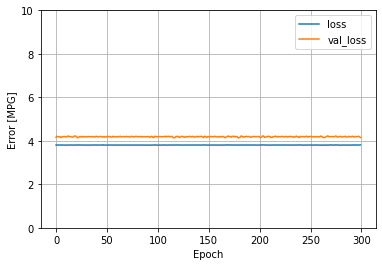

In [ ]:
import matplotlib.pyplot as plt 
plot_loss(history)

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    X_test['Horsepower'],
    y_test, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(X_train['Horsepower'], y_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

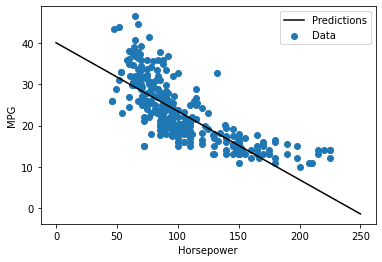

In [ ]:
plot_horsepower(x,y)

In [ ]:
# multiple inputs 

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    X_train, y_train, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.87 s, sys: 120 ms, total: 2.99 s
Wall time: 2.84 s


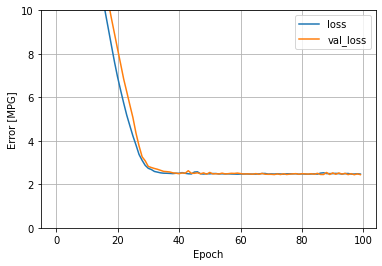

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    X_test, y_test, verbose=0)

# DNN - MODEL 

In [ ]:
def build(norm):
    model = tf.keras.Sequential([
    norm, 
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'), 
    layers.Dense(1)
    ])

    model.compile(loss = 'mean_absolute_error',
                  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001))
    return model

In [ ]:
dnn_horsepower_model = build(horsepower_normalizer)

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_horsepower_model.fit(
    X_train['Horsepower'], y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.19 s, sys: 174 ms, total: 3.36 s
Wall time: 3.09 s


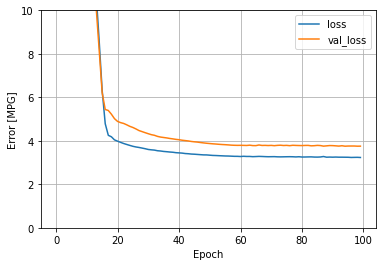

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

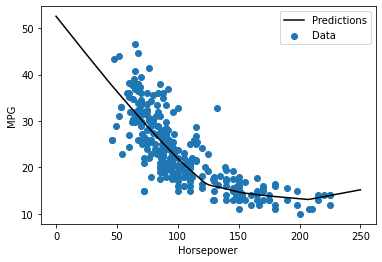

In [ ]:
plot_horsepower(x, y)

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    X_test['Horsepower'], y_test,
    verbose=0)

In [ ]:
dnn_model = build(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.23 s, sys: 161 ms, total: 3.39 s
Wall time: 3.14 s


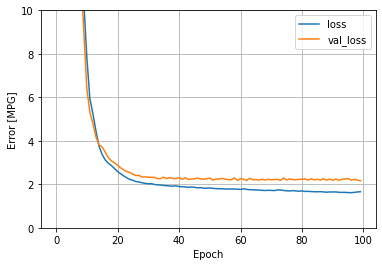

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)


In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.625063
linear_model,2.454289
dnn_horsepower_model,2.882832
dnn_model,1.740860


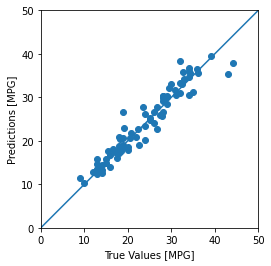

In [ ]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

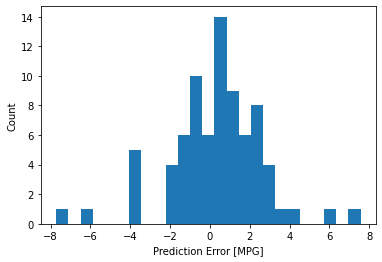

In [ ]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    X_test, y_test, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.625063
linear_model,2.454289
dnn_horsepower_model,2.882832
dnn_model,1.740860
reloaded,1.740860
